In [9]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("BTC.csv", usecols=['close_timestamp', 'open', 'high', 'low', 'close', 'volume'])
df.head()

,open,high,low,close,volume,close_timestamp
0,5960000.0,5960000.0,5953620.6,5959999.2,0.024950,2025-05-21 12:00:00
1,5958369.6,5959997.6,5953620.6,5956611.0,0.004990,2025-05-21 12:05:00
2,5954892.4,5964160.9,5951785.3,5964160.8,0.002281,2025-05-21 12:10:00
3,5956806.4,5964158.5,5955621.4,5964158.5,0.000872,2025-05-21 12:15:00
4,5951784.8,5958266.0,5951784.8,5954310.6,0.000573,2025-05-21 12:20:00


In [3]:
features = ['open', 'high', 'low', 'volume']
target = 'close'

train = df.iloc[:-50]
test = df.iloc[-50:]

X_train, y_train = train.drop(columns=['close_timestamp','close']), train['close']
X_test, y_test = test.drop(columns=['close_timestamp','close']), test['close']

y_train = y_train / 1e6
y_test = y_test / 1e6

In [4]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2271, number of used features: 4
[LightGBM] [Info] Start training from score 6.068225


LGBMRegressor()

In [5]:
predictions = model.predict(X_test)

In [6]:
y_test = y_test * 1e6
y_pred_original = predictions * 1e6

In [7]:
mae = mean_absolute_error(y_test, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 3247.729115339201
RMSE: 4287.206043233272


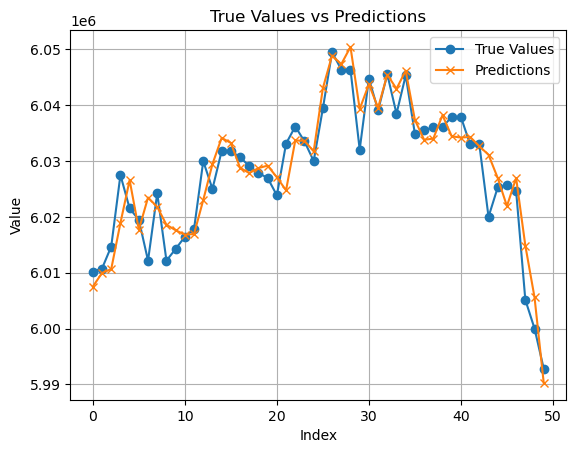

In [8]:
indices = range(len(y_test))  # x-axis: 0, 1, 2, ...

plt.plot(indices, y_test, label='True Values', marker='o')
plt.plot(indices, y_pred_original, label='Predictions', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('True Values vs Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
joblib.dump(model, "lightgbm_model.pkl")


['lightgbm_model.pkl']